# HW1 - MovieLens dataset

## Set Up!

In [ ]:
import pandas as pd
import seaborn as sns
from scipy.sparse import csr_array
import numpy as np
from sklearn.preprocessing import normalize

## Loading data

In [ ]:
ratings = pd.read_csv("/content/drive/MyDrive/ml-latest-small/ratings.csv")
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
movies = pd.read_csv("/content/drive/MyDrive/ml-latest-small/movies.csv")
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
tags = pd.read_csv("/content/drive/MyDrive/ml-latest-small/tags.csv")
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [ ]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


## Basic Statistics




*   How many items are in the data set? There are 9724 items in the data set!
* How many users? There are 610 users!
* How many ratings? There are 100836 ratings!

In [ ]:
ratings[['userId', 'movieId']].nunique()

userId      610
movieId    9724
dtype: int64

In [ ]:
len(ratings)

100836

User Activity

---


* What is the distribution of ratings-per-user?

First we have to find the rating count and mean of each user!

In [ ]:
user_stats = ratings.groupby('userId')['rating'].agg(['count', 'mean','sum']).rename(columns={'count': 'rating_count'})
user_stats

,rating_count,mean,sum
userId,,,
1,232,4.366379,1013.0
2,29,3.948276,114.5
3,39,2.435897,95.0
4,216,3.555556,768.0
5,44,3.636364,160.0
...,...,...,...
606,1115,3.657399,4078.0
607,187,3.786096,708.0
608,831,3.134176,2604.5


Here is the distribution with the hist plot!

<Axes: ylabel='Frequency'>

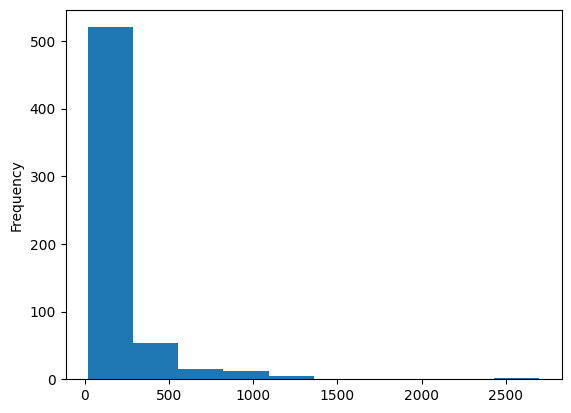

In [ ]:
user_stats['rating_count'].plot.hist()

Here is the distribution with ecdf plot!

<Axes: xlabel='rating_count', ylabel='Proportion'>

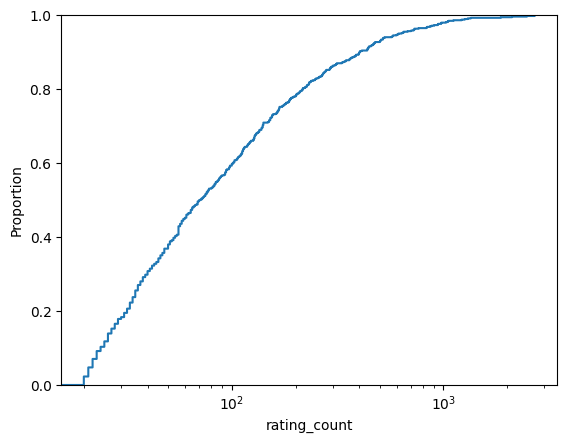

In [ ]:
sns.ecdfplot(x=user_stats['rating_count'], log_scale=True)


Item Statistics

---


*   What is the item popularity curve (the distribution of ratings-per-item)?




First we have to find the rating count, mean, and sum of each movie!

In [ ]:
item_stats = ratings.groupby('movieId')['rating'].agg(['count', 'mean','sum']).rename(columns={'count': 'rating_count'})
item_stats

,rating_count,mean,sum
movieId,,,
1,215,3.920930,843.0
2,110,3.431818,377.5
3,52,3.259615,169.5
4,7,2.357143,16.5
5,49,3.071429,150.5
...,...,...,...
193581,1,4.000000,4.0
193583,1,3.500000,3.5
193585,1,3.500000,3.5


Here is the distribution shown with ecdf plot!

<Axes: xlabel='rating_count', ylabel='Proportion'>

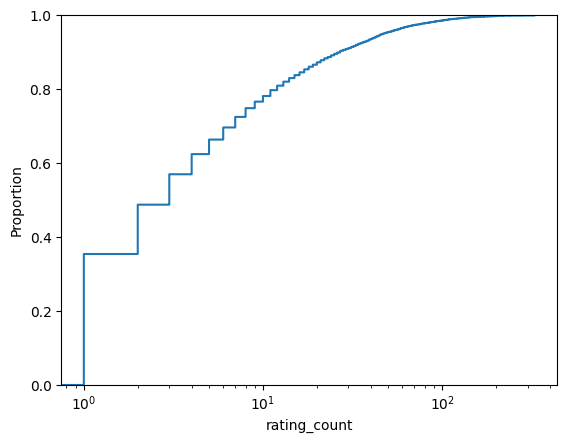

In [ ]:
sns.ecdfplot(x=item_stats['rating_count'], log_scale=True)



*   What is the distribution of average ratings for items?




Here is the the distribution shown with hist plot!

<Axes: ylabel='Frequency'>

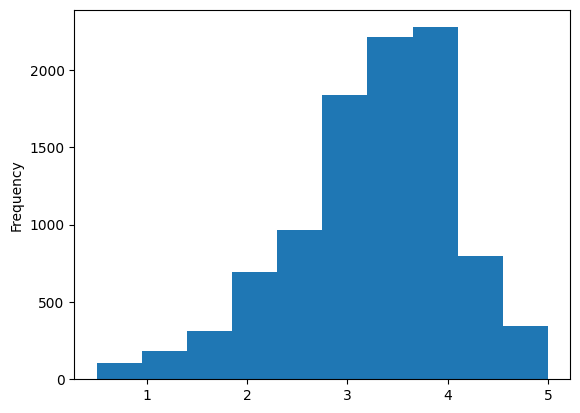

In [ ]:
item_stats['mean'].plot.hist()

## Non-personalized Recommendation



*   What are the 10 most popular items (the items with the most ratings)? Show the item ID, item title, and the number of ratings.



We can find the 10 most popular items regarding the number of ratings.

In [ ]:
item_stats['rating_count'].nlargest(10)

movieId
356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
Name: rating_count, dtype: int64

We join the item_stats dataframe with the movies dataframe to be able to show the title of the movies!

In [ ]:
item_ranks = movies.join(item_stats, on = 'movieId')
item_ranks

,movieId,title,genres,rating_count,mean,sum
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930,843.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818,377.5
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615,169.5
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143,16.5
4,5,Father of the Bride Part II (1995),Comedy,49.0,3.071429,150.5
...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1.0,4.000000,4.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1.0,3.500000,3.5
9739,193585,Flint (2017),Drama,1.0,3.500000,3.5
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1.0,3.500000,3.5


Here are the 10 movies with the most ratings!

In [ ]:
item_ranks[['movieId','title','rating_count']].nlargest(10,'rating_count')

,movieId,title,rating_count
314,356,Forrest Gump (1994),329.0
277,318,"Shawshank Redemption, The (1994)",317.0
257,296,Pulp Fiction (1994),307.0
510,593,"Silence of the Lambs, The (1991)",279.0
1939,2571,"Matrix, The (1999)",278.0
224,260,Star Wars: Episode IV - A New Hope (1977),251.0
418,480,Jurassic Park (1993),238.0
97,110,Braveheart (1995),237.0
507,589,Terminator 2: Judgment Day (1991),224.0
461,527,Schindler's List (1993),220.0




*   What are the 10 items with the highest average ratings (with their titles and average ratings)?



Here are the 10 items with the highest average ratings!

In [ ]:
item_ranks[['movieId','title','rating_count','mean']].nlargest(10,'mean')

,movieId,title,rating_count,mean
48,53,Lamerica (1994),2.0,5.0
87,99,Heidi Fleiss: Hollywood Madam (1995),2.0,5.0
121,148,"Awfully Big Adventure, An (1995)",1.0,5.0
405,467,Live Nude Girls (1995),1.0,5.0
432,495,In the Realm of the Senses (Ai no corrida) (1976),1.0,5.0
433,496,What Happened Was... (1994),1.0,5.0
531,626,"Thin Line Between Love and Hate, A (1996)",1.0,5.0
536,633,Denise Calls Up (1995),1.0,5.0
666,876,Supercop 2 (Project S) (Chao ji ji hua) (1993),1.0,5.0
865,1140,Entertaining Angels: The Dorothy Day Story (1996),1.0,5.0


* What are the 10 items with the highest damped average ratings, with a damping factor of 5?

First we calculate the damped_mean for each movie using the sum and the mean columns!

In [ ]:
item_ranks['damped_mean'] = item_ranks['sum'] + (5* ratings['rating'].mean()) / (item_ranks['rating_count'] + 5)
item_ranks.head()

,movieId,title,genres,rating_count,mean,sum,damped_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930,843.0,843.079581
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818,377.5,377.652242
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615,169.5,169.807154
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143,16.5,17.958982
4,5,Father of the Bride Part II (1995),Comedy,49.0,3.071429,150.5,150.824218


Here are the 10 items with the highest damped_mean ratings!

In [ ]:
item_ranks[['movieId','title','rating_count','mean','damped_mean',]].nlargest(10,'damped_mean')

,movieId,title,rating_count,mean,damped_mean
277,318,"Shawshank Redemption, The (1994)",317.0,4.429022,1404.054372
314,356,Forrest Gump (1994),329.0,4.164134,1370.052419
257,296,Pulp Fiction (1994),307.0,4.197068,1288.556115
1939,2571,"Matrix, The (1999)",278.0,4.192446,1165.561865
510,593,"Silence of the Lambs, The (1991)",279.0,4.161290,1161.061647
224,260,Star Wars: Episode IV - A New Hope (1977),251.0,4.231076,1062.068390
97,110,Braveheart (1995),237.0,4.031646,955.572346
2226,2959,Fight Club (1999),218.0,4.272936,931.578510
461,527,Schindler's List (1993),220.0,4.225000,929.577812
418,480,Jurassic Park (1993),238.0,3.750000,892.572048


## Item Similarity

### Probability

---


* What are the 5 most popular movies among users who also rated Toy Story (not
counting Toy Story itself)?

In [ ]:
ratings[['userId', 'movieId']].agg(['min', 'max', 'nunique'])

,userId,movieId
min,1,1
max,610,193609
nunique,610,9724


We have to create an index of user IDs and movie IDs to ensure that our matrix has indexes that are:
- 0-based
- Contiguous

In [ ]:
item_idx = pd.Index(ratings['movieId'].unique())
item_idx

Int64Index([     1,      3,      6,     47,     50,     70,    101,    110,
               151,    157,
            ...
            147662, 148166, 149011, 152372, 158721, 160341, 160527, 160836,
            163937, 163981],
           dtype='int64', length=9724)

In [ ]:
user_idx = pd.Index(ratings['userId'].unique())
user_idx

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            601, 602, 603, 604, 605, 606, 607, 608, 609, 610],
           dtype='int64', length=610)

Now we need to map the user and item IDs to indexes.  

In [ ]:
ratings['row'] = user_idx.get_indexer_for(ratings['userId'])
ratings['col'] = item_idx.get_indexer_for(ratings['movieId'])
ratings.head()

,userId,movieId,rating,timestamp,row,col
0,1,1,4.0,964982703,0,0
1,1,3,4.0,964981247,0,1
2,1,6,4.0,964982224,0,2
3,1,47,5.0,964983815,0,3
4,1,50,5.0,964982931,0,4


With this row and col columns we can form a sparse matrix in coordinate format.

In [ ]:
ifmat = csr_array((np.ones(len(ratings), dtype=np.float32), (ratings['row'], ratings['col'])))
ifmat

<610x9724 sparse array of type '<class 'numpy.float32'>'
	with 100836 stored elements in Compressed Sparse Row format>

Here is out co-occurrence matrix:

In [ ]:
conditional_cooc = ifmat.T @ ifmat
conditional_cooc

<9724x9724 sparse array of type '<class 'numpy.float32'>'
	with 26325068 stored elements in Compressed Sparse Column format>

Now we want to find the id of the Toy Story movie! Here we assume that the instructions meant ToyStory (1995)

In [ ]:
toy_story = movies[movies['title'].str.contains('Toy Story')]
toy_story

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2355,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy
7355,78499,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX


Now we need to know the location of the movie in the index!

In [ ]:
index_story = item_idx.get_loc(1)
index_story

0

Now that we know the location, we can calculate the conditional probability of our movie with other movies using co-occurance matrix! `cooc[:,[0]] / cooc[0,0]`

After that we need to join this with the movie dataframe to be able to see the title of the most popular movies among the users who also rated Toy Story!

In [ ]:
toy_story_p = conditional_cooc[:,[index_story]] / conditional_cooc[index_story,index_story]
toy_story_p = pd.Series(toy_story_p.toarray()[:,0],index = item_idx).to_frame('conditional_prob')
toy_story_p = movies.join(toy_story_p,on='movieId')
toy_story_p.nlargest(6,'conditional_prob')[['title','conditional_prob']]

,title,conditional_prob
0,Toy Story (1995),1.000000
314,Forrest Gump (1994),0.716279
257,Pulp Fiction (1994),0.655814
277,"Shawshank Redemption, The (1994)",0.637209
224,Star Wars: Episode IV - A New Hope (1977),0.623256
418,Jurassic Park (1993),0.613953


* What are the 5 most popular movies among users who also rated 10 Things I Hate
About You?

We do the same process to find the 5 most popular movies among users who also rated 10 Things I Hate About You!

In [ ]:
hate_about_you = movies[movies['title'].str.contains('10 Things I Hate About You')]
hate_about_you

,movieId,title,genres
1940,2572,10 Things I Hate About You (1999),Comedy|Romance


In [ ]:
index_hate_about_you = item_idx.get_loc(2572)
index_hate_about_you

1000

In [ ]:
hate_about_you_p = conditional_cooc[:,[index_hate_about_you]] / conditional_cooc[index_hate_about_you,index_hate_about_you]
hate_about_you_p = pd.Series(hate_about_you_p.toarray()[:,0],index = item_idx).to_frame('conditional_prob')
hate_about_you_p = movies.join(hate_about_you_p,on='movieId')
hate_about_you_p.nlargest(6,'conditional_prob')[['title','conditional_prob']]

,title,conditional_prob
1940,10 Things I Hate About You (1999),1.000000
314,Forrest Gump (1994),0.759259
2145,American Beauty (1999),0.703704
1939,"Matrix, The (1999)",0.648148
2226,Fight Club (1999),0.648148
257,Pulp Fiction (1994),0.629630


* Pick another movie of your choice to generate a top-5 list.

I chose Forrest Gump movie, and I did the same process to find the top-5 list!

In [ ]:
forest_gump = movies[movies['title'].str.contains('Forrest Gump')]
forest_gump

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [ ]:
index_forrest = item_idx.get_loc(356)
index_forrest

20

In [ ]:
forest_gump_p = conditional_cooc[:,[index_forrest]] / conditional_cooc[index_forrest,index_forrest]
forest_gump_p = pd.Series(forest_gump_p.toarray()[:,0],index = item_idx).to_frame('conditional_prob')
forest_gump_p = movies.join(forest_gump_p,on='movieId')
forest_gump_p.nlargest(6,'conditional_prob')[['title','conditional_prob']]

,title,conditional_prob
314,Forrest Gump (1994),1.000000
277,"Shawshank Redemption, The (1994)",0.702128
257,Pulp Fiction (1994),0.699088
510,"Silence of the Lambs, The (1991)",0.604863
418,Jurassic Park (1993),0.601824
1939,"Matrix, The (1999)",0.589666


Lift


---


* What are the 5 most popular movies among users who also rated Toy Story (not
counting Toy Story itself)?


To calculate the lift, we need to first calculate the probability of each item using the diagonal of co-occurance matrix!

In [ ]:
item_counts = pd.Series(conditional_cooc.diagonal(),index = item_idx,name = 'prob_i')
item_probs = item_counts/item_counts.sum()
item_probs.describe()

count    9724.000000
mean        0.000103
std         0.000222
min         0.000010
25%         0.000010
50%         0.000030
75%         0.000089
max         0.003263
Name: prob_i, dtype: float64

Now joining these probabilities with the dataframe we had for Toy Story movie let us to have two columns of item probability `prob_i` and conditional probability `conditional_prob`. Thus, we can calculate the lift for each item using these two columns, and we can find the 5 most popular items regarding the lift!

In [ ]:
toy_story_p = toy_story_p.join(item_probs,on='movieId')
toy_story_p['lift'] = toy_story_p['conditional_prob'] / toy_story_p['prob_i']
toy_story_p.nlargest(5,'lift')

,movieId,title,genres,conditional_prob,prob_i,lift
411,473,In the Army Now (1994),Comedy|War,0.032558,0.000069,469.004665
807,1056,Jude (1996),Drama,0.032558,0.000069,469.004665
1163,1542,Brassed Off (1996),Comedy|Drama|Romance,0.032558,0.000069,469.004665
1287,1713,Mouse Hunt (1997),Children|Comedy,0.032558,0.000069,469.004665
1366,1866,"Big Hit, The (1998)",Action|Comedy|Crime,0.032558,0.000069,469.004665


* What are the 5 most popular movies among users who also rated 10 Things I Hate About You?

We can do the same process to find the 5 most popular movies among users who also rated 10 Things I Hate About You regarding the lift!

In [ ]:
hate_about_you_p = hate_about_you_p.join(item_probs,on='movieId')
hate_about_you_p['lift'] = hate_about_you_p['conditional_prob'] / hate_about_you_p['prob_i']
hate_about_you_p.nlargest(5,'lift')

,movieId,title,genres,conditional_prob,prob_i,lift
4618,6881,Pieces of April (2003),Comedy|Drama,0.129630,0.000069,1867.333388
69,77,Nico Icon (1995),Documentary,0.018519,0.000010,1867.333364
85,96,In the Bleak Midwinter (1995),Comedy|Drama,0.018519,0.000010,1867.333364
96,108,Catwalk (1996),Documentary,0.018519,0.000010,1867.333364
103,118,If Lucy Fell (1996),Comedy|Romance,0.037037,0.000020,1867.333364


* Pick another movie of your choice to generate a top-5 list.

We can do the same process to find the 5 most popular movies among users who also rated Forrest Gump regarding the lift!

In [ ]:
forest_gump_p = forest_gump_p.join(item_probs,on='movieId')
forest_gump_p['lift'] = forest_gump_p['conditional_prob'] / forest_gump_p['prob_i']
forest_gump_p.nlargest(5,'lift')

,movieId,title,genres,conditional_prob,prob_i,lift
78,87,Dunston Checks In (1996),Children|Comedy,0.021277,0.000069,306.49241
335,378,Speechless (1994),Comedy|Romance,0.021277,0.000069,306.49241
411,473,In the Army Now (1994),Comedy|War,0.021277,0.000069,306.49241
475,542,Son in Law (1993),Comedy|Drama|Romance,0.042553,0.000139,306.49241
572,700,Angus (1995),Comedy,0.021277,0.000069,306.49241


### Rating Similarity

---


First we remove all items with fewer than 5 ratings!

In [ ]:
item_stats = item_stats[item_stats['rating_count'] > 5]
item_stats

,rating_count,mean,sum
movieId,,,
1,215,3.920930,843.0
2,110,3.431818,377.5
3,52,3.259615,169.5
4,7,2.357143,16.5
5,49,3.071429,150.5
...,...,...,...
177765,13,3.538462,46.0
179401,6,3.666667,22.0
179819,12,3.125000,37.5


Then we merge the `item_stat` with the `ratings` datasets to have the ratings and the mean of the ratings for each movie!

In [ ]:
nratings = pd.merge(ratings[['userId','movieId','rating']], item_stats['mean'], on='movieId')
nratings

,userId,movieId,rating,mean
0,1,1,4.0,3.920930
1,5,1,4.0,3.920930
2,7,1,4.5,3.920930
3,15,1,2.5,3.920930
4,17,1,4.5,3.920930
...,...,...,...,...
88359,525,74530,2.5,2.357143
88360,534,74530,2.5,2.357143
88361,556,74530,3.5,2.357143
88362,567,74530,0.5,2.357143


Now, we can easily calculate mean-centered rating with rating and mean columns

In [ ]:
nratings['mc_rating'] = nratings['rating'] - nratings['mean']
nratings.head()

,userId,movieId,rating,mean,mc_rating
0,1,1,4.0,3.92093,0.07907
1,5,1,4.0,3.92093,0.07907
2,7,1,4.5,3.92093,0.57907
3,15,1,2.5,3.92093,-1.42093
4,17,1,4.5,3.92093,0.57907


Now we have to map the user and item IDs to indexes!

In [ ]:
item_idx = pd.Index(nratings['movieId'].unique())
item_idx

Int64Index([    1,     3,     6,    47,    50,    70,   101,   110,   151,
              157,
            ...
            48142,  4754,  3889,  4210, 74545,  2676,  1977,  1701,  7101,
            74530],
           dtype='int64', length=3268)

In [ ]:
user_idx = pd.Index(nratings['userId'].unique())
user_idx

Int64Index([  1,   5,   7,  15,  17,  18,  19,  21,  27,  31,
            ...
            333, 127, 184, 496, 306, 506, 397, 556, 175, 578],
           dtype='int64', length=610)

Now we can form a sparse matrix in coordinate format!

In [ ]:
nratings['row'] = user_idx.get_indexer_for(nratings['userId'])
nratings['col'] = item_idx.get_indexer_for(nratings['movieId'])
nratings.head()

,userId,movieId,rating,mean,mc_rating,row,col
0,1,1,4.0,3.92093,0.07907,0,0
1,5,1,4.0,3.92093,0.07907,1,0
2,7,1,4.5,3.92093,0.57907,2,0
3,15,1,2.5,3.92093,-1.42093,3,0
4,17,1,4.5,3.92093,0.57907,4,0


Now, we can have our sparse matrix with `csr_array`!

In [ ]:
rmat = csr_array((nratings['mc_rating'], (nratings['row'], nratings['col'])))
rmat

<610x3268 sparse array of type '<class 'numpy.float64'>'
	with 88364 stored elements in Compressed Sparse Row format>

We can normalize our rating vectors of the sparse matrix with normalize function from skitlearn library!

In [ ]:
rmat_normalized = normalize(rmat, norm='l2',axis = 0)
rmat_normalized

<610x3268 sparse array of type '<class 'numpy.float64'>'
	with 88364 stored elements in Compressed Sparse Column format>

The cosine similarity of the movies can be calculated with co-occurance matrix!

In [ ]:
rating_cooc = rmat_normalized.T @ rmat_normalized
rating_cooc

<3268x3268 sparse array of type '<class 'numpy.float64'>'
	with 8543305 stored elements in Compressed Sparse Row format>

We can see that the cosine similarity of an item with itself is 1

In [ ]:
rating_cooc[1,1]

1.0

Now, we are going to compute top-5 lists for the same 3 movies above based on cosine similarity between rating vectors.

* Toy Story

In [ ]:
index_story = item_idx.get_loc(1)
toy_story_cosine = rating_cooc[:,[index_story]]
toy_story_cosine = pd.Series(toy_story_cosine.toarray()[:,0],index = item_idx).to_frame('cosine_sim')
toy_story_cosine = movies.join(toy_story_cosine,on='movieId')
toy_story_cosine.nlargest(6,'cosine_sim')[['title','cosine_sim']]

,title,cosine_sim
0,Toy Story (1995),1.000000
2355,Toy Story 2 (1999),0.318666
4360,Finding Nemo (2003),0.318374
506,Aladdin (1992),0.316544
5374,"Incredibles, The (2004)",0.276687
1052,101 Dalmatians (1996),0.267269


* 10 Things I Hate About You

In [ ]:
index_hate_about_you = item_idx.get_loc(2572)
hate_about_you_cosine = rating_cooc[:,[index_hate_about_you]]
hate_about_you_cosine = pd.Series(hate_about_you_cosine.toarray()[:,0],index = item_idx).to_frame('cosine_sim')
hate_about_you_cosine = movies.join(hate_about_you_cosine,on='movieId')
hate_about_you_cosine.nlargest(6,'cosine_sim')[['title','cosine_sim']]

,title,cosine_sim
1940,10 Things I Hate About You (1999),1.000000
2899,Bring It On (2000),0.398090
2112,Teaching Mrs. Tingle (1999),0.362721
4423,"Legally Blonde 2: Red, White & Blonde (2003)",0.361528
6482,Hairspray (2007),0.345882
4884,EuroTrip (2004),0.342260


* Forrest gump : the position of this film in the item index is 20!

In [ ]:
index_forrest = item_idx.get_loc(356)
forest_gump_cosine = rating_cooc[:,[index_forrest]]
forest_gump_cosine = pd.Series(forest_gump_cosine.toarray()[:,0],index = item_idx).to_frame('cosine_sim')
forest_gump_cosine = movies.join(forest_gump_cosine,on='movieId')
forest_gump_cosine.nlargest(6,'cosine_sim')[['title','cosine_sim']]

,title,cosine_sim
314,Forrest Gump (1994),1.000000
506,Aladdin (1992),0.256062
97,Braveheart (1995),0.252413
1740,"Waterboy, The (1998)",0.248357
1267,"Truman Show, The (1998)",0.245975
693,Charade (1963),0.239805


### Content-Based Similarity

---


In [ ]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [ ]:
item_idx = pd.Index(tags['movieId'].unique())
item_idx

Int64Index([ 60756,  89774, 106782,  48516,    431,   1221,   5995,  44665,
             52604,  88094,
            ...
              6157,  35836,  52712,    273,   1357,   1948,   5694,   6107,
              7936,   3265],
           dtype='int64', length=1572)

In [ ]:
tags['row'] = item_idx.get_indexer_for(tags['movieId'])
tags.head()

,userId,movieId,tag,timestamp,row
0,2,60756,funny,1445714994,0
1,2,60756,Highly quotable,1445714996,0
2,2,60756,will ferrell,1445714992,0
3,2,89774,Boxing story,1445715207,1
4,2,89774,MMA,1445715200,1


In [ ]:
tags['tagIndicator'] = 1

In [ ]:
pivot_tags = tags.pivot_table(index='row', columns='tag', values='tagIndicator', fill_value=0, aggfunc='max')
pivot_tags.head()

tag,"""artsy""",06 Oscar Nominated Best Movie - Animation,1900s,1920s,1950s,1960s,1970s,1980s,1990s,2001-like,...,women,wonderwoman,workplace,writing,wrongful imprisonment,wry,younger men,zither,zoe kazan,zombies
row,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
tags_normalized = normalize(pivot_tags, norm='l2',axis = 1)
tags_normalized

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
content_cooc = tags_normalized @ tags_normalized.transpose()
content_cooc

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

* Toy Story

In [ ]:
item_story = item_idx.get_loc(1)
toy_story_tags = content_cooc[:,[item_story]]
toy_story_tags = pd.Series(toy_story_tags[:,0],index = item_idx).to_frame('cosine_sim')
toy_story_tags = movies.join(toy_story_tags,on='movieId')
toy_story_tags.nlargest(6,'cosine_sim')[['title','cosine_sim']]

,title,cosine_sim
0,Toy Story (1995),1.000000
8695,Guardians of the Galaxy 2 (2017),0.707107
7693,"Avengers, The (2012)",0.267261
8357,The Lego Movie (2014),0.267261
257,Pulp Fiction (1994),0.053760
1,Jumanji (1995),0.000000


* 10 Things I Hate About You

In [ ]:
index_hate_about_you = item_idx.get_loc(2572)
hate_about_you_tags = content_cooc[:,[index_hate_about_you]]
hate_about_you_tags = pd.Series(hate_about_you_tags[:,0],index = item_idx).to_frame('cosine_sim')
hate_about_you_tags = movies.join(hate_about_you_tags,on='movieId')
hate_about_you_tags.nlargest(6,'cosine_sim')[['title','cosine_sim']]

,title,cosine_sim
942,Rosencrantz and Guildenstern Are Dead (1990),1.000000
1940,10 Things I Hate About You (1999),1.000000
999,Forbidden Planet (1956),0.707107
0,Toy Story (1995),0.000000
1,Jumanji (1995),0.000000
2,Grumpier Old Men (1995),0.000000


In [ ]:
index_forrest = item_idx.get_loc(356)
forrest_gump_tags = content_cooc[:,[index_forrest]]
forrest_gump_tags = pd.Series(forrest_gump_tags[:,0],index = item_idx).to_frame('cosine_sim')
forrest_gump_tags = movies.join(forrest_gump_tags,on='movieId')
forrest_gump_tags.nlargest(6,'cosine_sim')[['title','cosine_sim']]

,title,cosine_sim
314,Forrest Gump (1994),1.000000
8260,Short Term 12 (2013),0.447214
829,Platoon (1986),0.333333
909,Apocalypse Now (1979),0.333333
962,"Deer Hunter, The (1978)",0.333333
2215,Indochine (1992),0.333333


## Recommending for Users


For this section, we are going to pick 2 users, and generate two different item-based top-5 recommendation lists using two item similarity methods.
We are using rating similarities for userId 20!
So here are the datasets we are going to use for the similarity method: The co-occurance matrix for rating similarities mentioned in the last section, and the nrating dataset that we used to create this matrix!

In [ ]:
rating_cooc

<3268x3268 sparse array of type '<class 'numpy.float64'>'
	with 8543305 stored elements in Compressed Sparse Row format>

In [ ]:
nratings.head()

,userId,movieId,rating,mean,mc_rating,row,col
0,1,1,4.0,3.92093,0.07907,0,0
1,5,1,4.0,3.92093,0.07907,1,0
2,7,1,4.5,3.92093,0.57907,2,0
3,15,1,2.5,3.92093,-1.42093,3,0
4,17,1,4.5,3.92093,0.57907,4,0


Here we want to calculate the scoring function for userId = 20!
The scoring function is $S(j|u) = (∑ᵢ rᵤᵢwᵢⱼ)/(∑ᵢ rᵤᵢ)$

We know that Wᵢⱼ is the score for item j with respect to reference item i = CosineSimilarity(i,j) = `cooc[i,j]`

We have rᵤᵢ which is the rating of the user u for item i, and Wᵢⱼ in the nominator of the scoring function which i is the items that user u has rated!

Now we have to mask the items that user have rated in the cooc matrix! So first we create a vector of the rating items indices!

In [ ]:
user_ratings = nratings[nratings['userId'] == 20]
rated_indices = user_ratings['col'].values
len(rated_indices)

227

Now we can get the cooc values for just the movies that the user has rated and the cosine similarity of these movies with all the movies!

In [ ]:
masked_cooc = rating_cooc[:,rated_indices]
masked_cooc

<3268x227 sparse array of type '<class 'numpy.float64'>'
	with 673730 stored elements in Compressed Sparse Row format>

Now to calculate the nominator of the scoring function we can calculate the dot product of rating column of the user's dataframe with the masked cooc!

In [ ]:
nom = (masked_cooc * user_ratings['rating']).sum(axis = 1)
nom.shape

(3268,)

Denominator is simply sum of ratings of the user!

In [ ]:
denom = user_ratings['rating'].sum()
denom

821.0

So the scores of the movies for user u are :

In [ ]:
scores = nom/denom
scores

array([0.06270089, 0.06733581, 0.01190566, ..., 0.00168354, 0.04692812,
       0.00909336])

To be able to show the titles of the top-5 recommendations, we have to join scores series with movies dataframe. To do this, we need the indecies for movieIds. Since we used the rating similarities and we used nratings dataframe to create the ratings similarities, we need to have the indexes of the movieIds in the nrating dataframe!

In [ ]:
item_idx = pd.Index(nratings['movieId'].unique())
item_idx

Int64Index([    1,     3,     6,    47,    50,    70,   101,   110,   151,
              157,
            ...
            48142,  4754,  3889,  4210, 74545,  2676,  1977,  1701,  7101,
            74530],
           dtype='int64', length=3268)

In [ ]:
scores = pd.Series(scores,index = item_idx).to_frame('score')
scores = movies.join(scores,on='movieId')
scores.nlargest(5,'score')[['title','score']]

,title,score
1547,"Muppet Christmas Carol, The (1992)",0.113536
1552,"Rescuers Down Under, The (1990)",0.110142
783,"Sword in the Stone, The (1963)",0.109594
2537,"Great Muppet Caper, The (1981)",0.107703
3446,"Princess Diaries, The (2001)",0.097649


Now we do the same thing for userId =  30! But this time we use conditional probability as the weight. For this we will need the co-occurance matrix for conditional prob and the `ratings` dataframe we used to create it!

In [ ]:
conditional_cooc

<9724x9724 sparse array of type '<class 'numpy.float32'>'
	with 26325068 stored elements in Compressed Sparse Column format>

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp,row,col
0,1,1,4.0,964982703,0,0
1,1,3,4.0,964981247,0,1
2,1,6,4.0,964982224,0,2
3,1,47,5.0,964983815,0,3
4,1,50,5.0,964982931,0,4


In [ ]:
user_ratings = ratings[ratings['userId'] == 30]
user_ratings

,userId,movieId,rating,timestamp,row,col
4845,30,110,5.0,1500370456,29,7
4846,30,260,5.0,1500370339,29,15
4847,30,318,5.0,1500370344,29,232
4848,30,589,3.5,1500370430,29,478
4849,30,1036,4.0,1500370436,29,1134
4850,30,1196,5.0,1500370341,29,68
4851,30,1198,5.0,1500370343,29,70
4852,30,1200,3.0,1500370434,29,1028
4853,30,1210,5.0,1500370347,29,73
4854,30,1240,3.5,1500370449,29,81


Here we want to calculate the scoring function for userId = 20! The scoring function is  𝑆(𝑗|𝑢)=(∑ᵢ𝑟ᵤᵢ𝑤ᵢⱼ)/(∑ᵢ𝑟ᵤᵢ)

We know that Wᵢⱼ is the conditional probability for item j with respect to reference item i = prob(j|i) = `conditional_cooc[i,j]/conditional_cooc[i,i]`

We have rᵤᵢ which is the rating of the user u for item i, and Wᵢⱼ in the nominator of the scoring function which i is the items that user u has rated!

We need to mask the co-occurance matrix using the indecies and then we will divide it with the probability of each item to make the conditional probability matrix, which is the `probability(i,j)/probability(i)`

In [ ]:
rating_indices = user_ratings['col'].values
masked_cooc = conditional_cooc[:,rating_indices]
conditional_prob = conditional_cooc[:,rating_indices] / conditional_cooc[rating_indices,rating_indices]
conditional_prob

<9724x34 sparse array of type '<class 'numpy.float32'>'
	with 248080 stored elements in COOrdinate format>

Now we can calculate the nominator with respect to this matrix and the ratings of the user!

In [ ]:
cond_prob_dense = conditional_prob.todense()
nom = np.dot(cond_prob_dense, user_ratings['rating'])
nom.shape

(9724,)

And the denominator will be the sum of the users ratings!

In [ ]:
denom = user_ratings['rating'].sum(axis = 0)
denom

161.0

So the scores are:

In [ ]:
scores = nom/denom
scores

array([0.53865419, 0.09678673, 0.23768067, ..., 0.01180875, 0.01180875,
       0.01180875])

Now, we just join the scores with the movies dataframe to be able to see the titles

In [ ]:
item_idx = pd.Index(ratings['movieId'].unique())
scores = pd.Series(scores,index = item_idx).to_frame('score')
scores = movies.join(scores,on='movieId')
scores.nlargest(5,'score')[['title','score']]

,title,score
1939,"Matrix, The (1999)",0.795516
314,Forrest Gump (1994),0.743388
224,Star Wars: Episode IV - A New Hope (1977),0.733125
3638,"Lord of the Rings: The Fellowship of the Ring,...",0.684039
277,"Shawshank Redemption, The (1994)",0.682613


## Reflection

I learned a lot from this assignment. The content-based similarity sectoin was a little confusing for me, but I learned how should we consider